# PHP - Pulsating Heat Pipe
Data collection and preparation for data analysis and machine learning 

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
sns.set()

## Data loading

In [72]:
# loading and cleaning data
DataETL('data/data_php_al2o3/')

,Time (Min),Tc - AVG 1&2 (oC),"Te - AVG 1,2,3 (oC)",Pressure (mm of Hg).1,Te - Tc (oC),Q (W),Resistance (oC/W)
0,0.0,27.25,27.333333,285,0.083333,80,0.001042
1,0.5,27.25,27.333333,285,0.083333,80,0.001042
2,1.0,27.50,28.000000,285,0.500000,80,0.006250
3,1.5,27.75,28.666667,285,0.916667,80,0.011458
4,2.0,28.00,30.000000,285,2.000000,80,0.025000
...,...,...,...,...,...,...,...
601,48.0,73.75,84.333333,710,10.583333,80,0.132292
602,48.5,74.25,84.333333,710,10.083333,80,0.126042
603,49.0,74.75,84.333333,710,9.583333,80,0.119792
604,49.5,73.50,84.000000,710,10.500000,80,0.131250


In [68]:
df.describe()

,Time (Min),Tc - AVG 1&2 (oC),"Te - AVG 1,2,3 (oC)",Pressure (mm of Hg).1,Te - Tc (oC),Q (W),Resistance (oC/W)
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.0,505.000000
mean,25.000000,55.155941,67.709571,500.594059,12.553630,80.0,0.156920
std,14.591834,15.409983,16.678347,147.265564,5.044453,0.0,0.063056
min,0.000000,27.250000,27.333333,285.000000,0.083333,80.0,0.001042
25%,12.500000,43.000000,59.333333,360.000000,9.500000,80.0,0.118750
50%,25.000000,55.250000,73.666667,485.000000,11.666667,80.0,0.145833
75%,37.500000,73.000000,82.000000,660.000000,17.666667,80.0,0.220833
max,50.000000,75.000000,84.333333,710.000000,18.916667,80.0,0.236458


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time (Min)             505 non-null    float64
 1   Tc - AVG 1&2 (oC)      505 non-null    float64
 2   Te - AVG 1,2,3 (oC)    505 non-null    float64
 3   Pressure (mm of Hg).1  505 non-null    int64  
 4   Te - Tc (oC)           505 non-null    float64
 5   Q (W)                  505 non-null    int64  
 6   Resistance (oC/W)      505 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 27.7 KB


<Axes: >

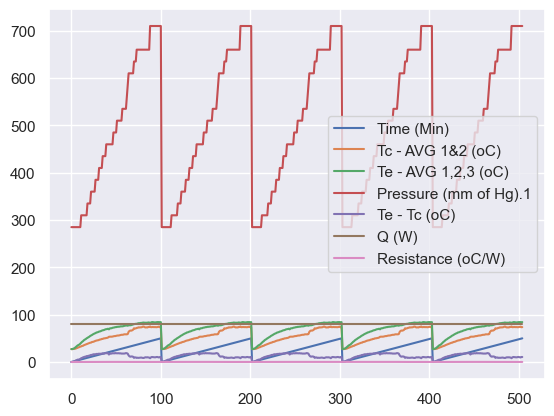

In [78]:
df.plot()